# FSM

The first simple model will be a simple linear regression of `Student Count Total` as a predictor of graduation rate.

Because this is an inferential project, I will not employ train test split.  I will instead iteratively improve the model by adding new features, checking the assumptions of linear regression as I proceed.

In [9]:
import os, sys

# Set absolute path to the root folder of the directory
full_path = os.getcwd()
home_folder = 'CPS_GradRate_Analysis'
root = full_path.split(home_folder)[0] + home_folder + '/'
sys.path.append(root)


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from src.preprocessing.preprocessing import years, paths
from src.preprocessing.preprocessing import create_sp_path_dictionary, import_multiple_sy_profiles, isolate_high_schools
from src.preprocessing.preprocessing import hs_df_dict
import matplotlib.pyplot as plt

In [10]:
hs_df_dict['2018-2019']['Graduation_Rate_School'].isna().sum()

0

In [11]:
hs_df_dict['2017-2018']['Graduation_Rate_School'].isna().sum()

0

In [12]:
hs_df_dict['2016-2017']['Graduation_Rate_School'].isna().sum()

0

In [13]:
['Graduation_Rate_School' in df.columns for df in hs_df_dict.values()]

[True, True, True]

In [14]:
# Put 3 years of school profiles into one dataframe
all_years = pd.concat([hs_df_dict['2016-2017'],hs_df_dict['2017-2018']])
all_years = pd.concat([all_years, hs_df_dict['2018-2019']])


In [15]:
all_years.shape

(386, 21)

In [16]:
all_years['School_ID'].value_counts()

609783    3
609676    3
400061    3
400062    3
400064    3
         ..
610566    1
610565    1
610564    1
610569    1
610568    1
Name: School_ID, Length: 143, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(all_years[['Student_Count_Total']], all_years['Graduation_Rate_School'])
lr.score(all_years[['Student_Count_Total']], all_years['Graduation_Rate_School'])

0.17061795850580186

In [19]:
from statsmodels.formula.api import ols

simple_formula = 'Graduation_Rate_School ~ Student_Count_Total'
fsm = ols(simple_formula, all_years ).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.171
Model:                                OLS   Adj. R-squared:                  0.168
Method:                     Least Squares   F-statistic:                     79.00
Date:                    Sun, 06 Jun 2021   Prob (F-statistic):           2.45e-17
Time:                            12:32:27   Log-Likelihood:                -1683.3
No. Observations:                     386   AIC:                             3371.
Df Residuals:                         384   BIC:                             3378.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              63.6706      1.441     44.196      0.000      60.838      66.503
Student_Count_Total     0.0128      0.001      8.888      0.000       0.010       0.016
==============================================================================
Omnibus:                      138.428   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.099
Skew:                          -1.737   Prob(JB):                     7.88e-83
Kurtosis:                       6.383   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals are Not Normally Distributed')

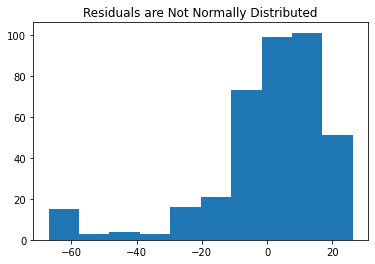

In [20]:
fig, ax = plt.subplots()
ax.hist(fsm.resid)
ax.set_title("Residuals are Not Normally Distributed")

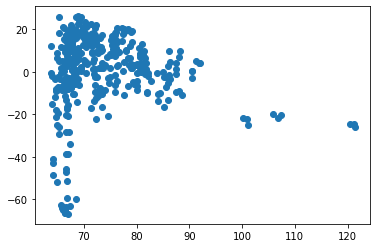

In [21]:
y_hat = fsm.predict(all_years['Student_Count_Total'])

fig, ax = plt.subplots()
ax.scatter(y_hat, fsm.resid,  )

# 2018-2019

In [24]:
hs_201819 = hs_df_dict['2018-2019']

In [25]:
lr = LinearRegression()
lr.fit(hs_201819[['Student_Count_Total']], hs_201819['Graduation_Rate_School'])
lr.score(hs_201819[['Student_Count_Total']], hs_201819['Graduation_Rate_School'])

0.1887636645057047

In [28]:
lr.coef_

array([0.01570873])